In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt



In [31]:
path = "/content/bank marketing dataset.csv"

In [32]:
data = pd.read_csv(path)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [33]:

# Specify the columns you want to encode
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Perform one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the first few rows of the encoded dataset
data_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


#This technique converts categorical values into a format that can be provided to ML algorithms to do a better job in prediction. It works by creating a binary column for each category and returns a matrix with the results. Using the same color example, one-hot encoding would create three columns, one for each color. If the color is 'Red', for example, the column for 'Red' would have a 1, and the others 0.

#Applying one-hot encoding to categorical variables indeed increases the number of features in your dataset. as you can see 52 columns instead of 17. so i apply Feature Selection to keep only the most relevant features, reducing the dimensionality of your dataset.

In [34]:
#The dataset has been normalized using MinMax scaling, which scales and translates each feature individually such that it is in the range [0, 1]
scaler = MinMaxScaler()

# Select only numerical columns for normalization
numerical_cols = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Apply MinMaxScaler to the numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])
data_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
#Here we split the data into training and test set so that we can fit and evaluate a learning model.
X = data_encoded.drop('y', axis=1)  # Features
y = data_encoded['y']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and fit the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Retrieve the feature importances and map them to the column names
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)

# Find the 10 most important features
most_important_features = feature_importances.nlargest(10).index

# Keep only the 10 most important features in the dataset
data_important_features = data_encoded[most_important_features.tolist() + ['y']]

# Display the updated dataset with only the most important features
data_important_features.head()

,duration,balance,age,day,poutcome_success,pdays,campaign,previous,housing_no,month_mar,y
0,0.053070,0.092259,0.519481,0.133333,0,0.0,0.0,0.0,0,0,0
1,0.030704,0.073067,0.337662,0.133333,0,0.0,0.0,0.0,0,0,0
2,0.015453,0.072822,0.194805,0.133333,0,0.0,0.0,0.0,0,0,0
3,0.018707,0.086476,0.376623,0.133333,0,0.0,0.0,0.0,0,0,0
4,0.040260,0.072812,0.194805,0.133333,0,0.0,0.0,0.0,1,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable if it's not numeric
le = LabelEncoder()
data_encoded['y'] = le.fit_transform(data_encoded['y'])

# Defining the features (X) and target (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Initialize and fit the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Retrieve the feature importances and map them to the column names
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)

# Find the 10 most important features
most_important_features = feature_importances.nlargest(10).index

# Keep only the 10 most important features in the dataset
data_important_features = data_encoded[most_important_features.tolist() + ['y']]

# Display the updated dataset with only the most important features
print(data_important_features.head())

   duration   balance       age       day  poutcome_success  pdays  campaign  \
0  0.053070  0.092259  0.519481  0.133333                 0    0.0       0.0   
1  0.030704  0.073067  0.337662  0.133333                 0    0.0       0.0   
2  0.015453  0.072822  0.194805  0.133333                 0    0.0       0.0   
3  0.018707  0.086476  0.376623  0.133333                 0    0.0       0.0   
4  0.040260  0.072812  0.194805  0.133333                 0    0.0       0.0   

   previous  housing_no  month_mar  y  
0       0.0           0          0  0  
1       0.0           0          0  0  
2       0.0           0          0  0  
3       0.0           0          0  0  
4       0.0           1          0  0  


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np


# Initializing the models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svc_model = SVC(random_state=42)


# Define the number of folds for cross-validation
k = 10

# Perform cross-validation and compute mean accuracy for each model
logistic_cv_scores = cross_val_score(logistic_model, X, y, cv=k)
logistic_cv_mean = np.mean(logistic_cv_scores)

random_forest_cv_scores = cross_val_score(random_forest_model, X, y, cv=k)
random_forest_cv_mean = np.mean(random_forest_cv_scores)

svc_cv_scroes = cross_val_score(svc_model,X,y, cv=k)
svc_cv_mean = np.mean(svc_cv_scroes)

knn_cv_scores = cross_val_score(knn_model, X, y, cv=k)
knn_cv_mean = np.mean(knn_cv_scores)

# Print the results
print(f"Logistic Regression CV Mean Accuracy: {logistic_cv_mean:.4f}")
print(f"Random Forest CV Mean Accuracy: {random_forest_cv_mean:.4f}")
print(f"SVC CV Mean Accuracy: {svc_cv_mean:.4f}")
print(f"KNN CV Mean Accuracy: {knn_cv_mean:.4f}")

Logistic Regression CV Mean Accuracy: 0.8134
Random Forest CV Mean Accuracy: 0.7248
SVC CV Mean Accuracy: 0.7332
KNN CV Mean Accuracy: 0.6496


#Based on the results obtained from cross-validation, it appears that Logistic Regression achieved the highest mean accuracy score of 81.34%, followed by Support Vector Classifier (SVC) with a mean accuracy of 73.32%. Random Forest and K-Nearest Neighbors (KNN) models achieved mean accuracies of 72.48% and 64.96%, respectively. These results suggest that Logistic Regression and SVC might be more suitable for this classification task compared to Random Forest and KNN.

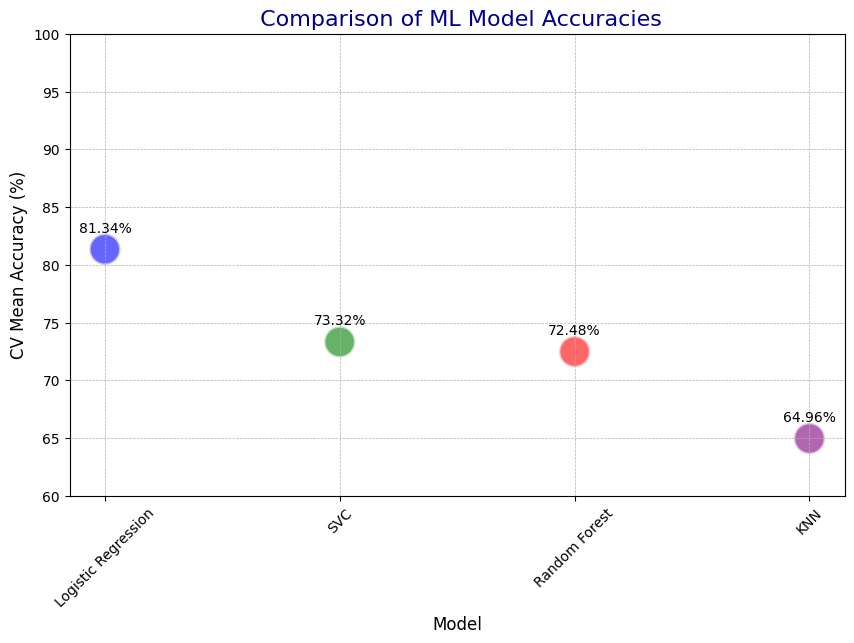

In [ ]:
models = ['Logistic Regression', 'SVC', 'Random Forest', 'KNN']
accuracies = [81.34, 73.32, 72.48, 64.96]

# Data for plotting
x = np.arange(len(models))  # the label locations
y = np.array(accuracies)

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=500, c=['blue', 'green', 'red', 'purple'], alpha=0.6, edgecolors="w", linewidth=2)

# Adding annotations
for i, txt in enumerate(accuracies):
    plt.annotate(f'{txt}%', (x[i], y[i] + 1.5), ha='center')

# Add title and labels with a creative touch
plt.title(' Comparison of ML Model Accuracies', fontsize=16, color='darkblue')
plt.xticks(x, models, rotation=45)
plt.yticks(np.arange(60, 101, 5))
plt.ylabel('CV Mean Accuracy (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Add grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show plot
plt.show()